# **Module 2: Probability Distributions & Interference**

**PHY657 Statistics & Data Analysis**  
February 16, 2026

In [1]:
%matplotlib widget
%matplotlib inline
from ipywidgets import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.style.use('dark_background')
plt.close('all')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": False,
        "figure.figsize": (9, 6),
        "figure.autolayout": True,
        "font.family": "serif",
        "font.serif": "DejaVu Serif",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

### **Activity 1: Empirical verification of the Central Limit Theorem**

Consider $N$ variables $x_1,\cdot,x_N$ each of which has a uniform distribution over the interval [0,1]. Consider the distribution of:
$$
\bar{x}=\frac{1}{N}\sum_{i=1}^N x_i
$$

for $N=1,2,10$. Can you fit the distribution of $\bar{x}$ for N=10 with a Gaussian PDF?  

**For your lab report:**  
review the central limit theorem and its implication in statistics and give examples where the Gaussian PDF is appropriate.

---

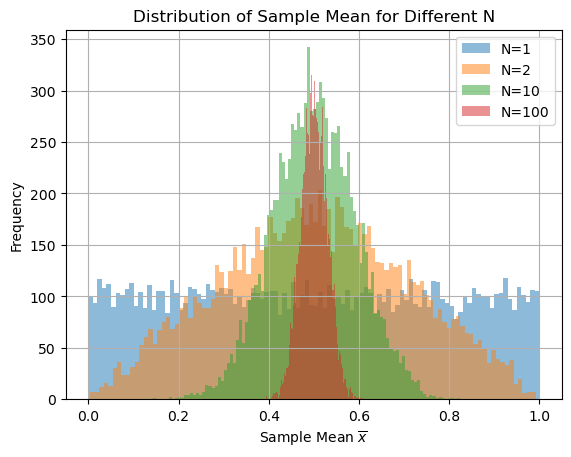

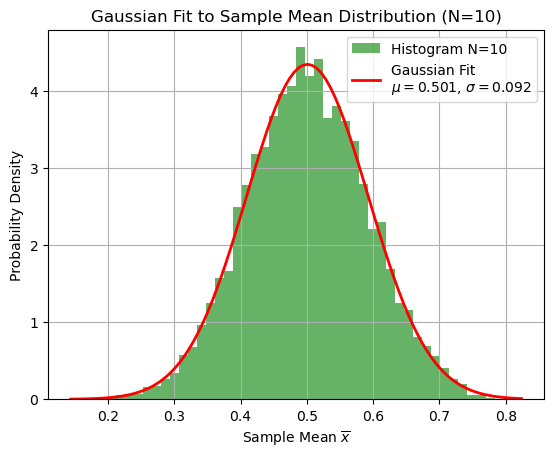

In [36]:
from scipy.stats import norm

# Empirical verification for N=1, 2, 10
sample_size = 10000


def gen_data(N, size):
    return [np.mean(np.random.uniform(0, 1, N)) for _ in range(size)]

means_N = []
for n in [1, 2, 10, 100]:
    means_N.append(gen_data(n, sample_size))

means_N1, means_N2, means_N10, means_N100 = means_N

num_bins = bins=int(np.sqrt(sample_size))

plt.hist(means_N1, bins=num_bins, alpha=0.5, label='N=1')
plt.hist(means_N2, bins=num_bins, alpha=0.5, label='N=2')
plt.hist(means_N10, bins=num_bins, alpha=0.5, label='N=10')
plt.hist(means_N100, bins=num_bins, alpha=0.5, label='N=100')
plt.xlabel(r'Sample Mean $\overline{x}$')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Mean for Different N')
plt.grid()
plt.legend()
plt.show()

# Fit N=10 sample means with a Gaussian PDF

mu, std = norm.fit(means_N10)
x = np.linspace(min(means_N10), max(means_N10), 100)
pdf = norm.pdf(x, mu, std)

plt.hist(means_N10, bins=50, density=True, alpha=0.6, color='g', label='Histogram N=10')
plt.plot(x, pdf, 'r-', lw=2, label=f'Gaussian Fit\n$\mu={mu:.3f}$, $\sigma={std:.3f}$')
plt.xlabel(r'Sample Mean $\overline{x}$')
plt.ylabel('Probability Density')
plt.title('Gaussian Fit to Sample Mean Distribution (N=10)')
plt.grid()
plt.legend()
plt.show()

### **Activity 4: Maxium Likelihood Estimation by hand**

Assume a dataset $\{x_n\}^{N}_{n=1}$ is drawn independently form a Gaussian distribtion with unknown mean $\mu$ and variance $\sigma^2$

---

1. **Write down the likelihood function $p(\{x_n\}|\mu, \sigma^2)$**
2. **Compute the log-likelihood.**
3. **Derive the Maximum likelihood estimator for $\mu$.**
4. **Derive the Maximum likelihood estimator for $\sigma^2$.**
5. **Compare your expresion for $\sigma^2$ with the unbiased sample variance estimator. Briefly explain the difference, and discuss when this difference is relavent**

In [8]:
# Generate sample data from a Gaussian distribution
import numpy as np
np.random.seed(42)
N = 100
mu_true = 5.0
sigma_true = 2.0
data = np.random.normal(mu_true, sigma_true, N)

# Maximum Likelihood Estimation
mu_mle = np.mean(data)
sigma2_mle = np.mean((data - mu_mle)**2)
sigma_mle = np.sqrt(sigma2_mle)

# Unbiased sample variance estimator
sigma2_unbiased = np.sum((data - mu_mle)**2) / (N - 1)
sigma_unbiased = np.sqrt(sigma2_unbiased)

print(f"True parameters: mu = {mu_true}, sigma2 = {sigma_true**2:.4f}")
print(f"\nMLE estimates: mu = {mu_mle:.4f}, sigma2 = {sigma2_mle:.4f}, sigma = {sigma_mle:.4f}")
print(f"Unbiased estimates: sigma2 = {sigma2_unbiased:.4f}, sigma = {sigma_unbiased:.4f}")
print(f"\nDifference in sigma2: {sigma2_unbiased - sigma2_mle:.4f}")
print(f"Ratio (Unbiased/MLE): {sigma2_unbiased / sigma2_mle:.4f}")


True parameters: mu = 5.0, sigma2 = 4.0000

MLE estimates: mu = 4.7923, sigma2 = 3.2661, sigma = 1.8072
Unbiased estimates: sigma2 = 3.2991, sigma = 1.8163

Difference in sigma2: 0.0330
Ratio (Unbiased/MLE): 1.0101


## Activity 6: Likelihood shape and parameter uncertainty

In this exercise you will visualize how the likelihood function changes with dataset size. 

1. Generate $N = 20$ samples form a Gaussian distributino with known parameters. 

2. Plot the log-likelihood as a function of $\mu$ over a grid of trial values. 
3. Comute the log-likelihood verus $\mu$ and identify the maxium likelihood estimate.
4. Repeat this procedure for $N = 100$ and $N = 1000$ samples. 
5. Compare the width of the likelihood peak in the two cases and discuss how parameter uncertainity scales with $N$

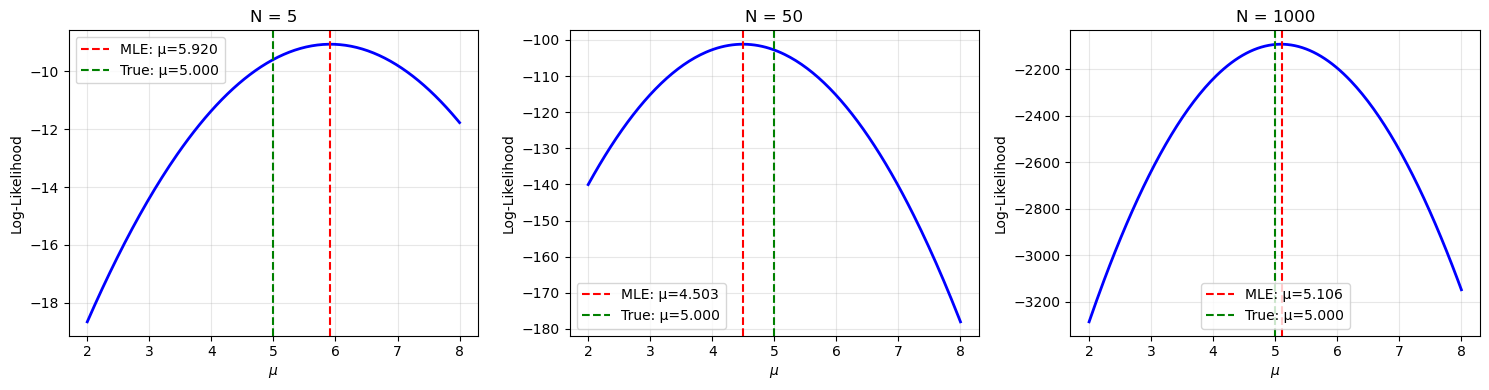

Log-Likelihood Analysis:
N = 5: Peak width (at -1 from max) = 2.5025
N = 50: Peak width (at -1 from max) = 0.7538
N = 1000: Peak width (at -1 from max) = 0.1508


In [15]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

def log_likelihood(data, mu, sigma):
    return -0.5 * np.sum(((data - mu) / sigma)**2) - len(data) * np.log(sigma * np.sqrt(2 * np.pi))

# Use sigma_true (known) for all calculations
sigma_known = sigma_true

# Generate datasets for different sample sizes
sample_sizes = [5, 50, 1000]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

mu_grid = np.linspace(2, 8, 200)
results = {}

for idx, n_samples in enumerate(sample_sizes):
    # Generate data
    data_n = np.random.normal(mu_true, sigma_true, n_samples)
    
    # Compute log-likelihood over mu grid
    log_liks = [log_likelihood(data_n, mu, sigma_known) for mu in mu_grid]
    
    # Find MLE
    mu_mle_n = mu_grid[np.argmax(log_liks)]
    max_log_lik = np.max(log_liks)
    
    # Store results
    results[n_samples] = {'mu_mle': mu_mle_n, 'log_liks': log_liks}
    
    # Plot
    axes[idx].plot(mu_grid, log_liks, 'b-', lw=2)
    axes[idx].axvline(mu_mle_n, color='r', linestyle='--', label=f'MLE: μ={mu_mle_n:.3f}')
    axes[idx].axvline(mu_true, color='g', linestyle='--', label=f'True: μ={mu_true:.3f}')
    axes[idx].set_xlabel(r'$\mu$')
    axes[idx].set_ylabel('Log-Likelihood')
    axes[idx].set_title(f'N = {n_samples}')
    axes[idx].grid(alpha=0.3)
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Analyze peak width
print("Log-Likelihood Analysis:")
for n_samples in sample_sizes:
    log_liks = results[n_samples]['log_liks']
    max_log_lik = np.max(log_liks)
    # Find width at half maximum
    half_max = max_log_lik - 1  # 1 unit below peak
    width_indices = np.where(np.array(log_liks) > half_max)[0]
    peak_width = mu_grid[width_indices[-1]] - mu_grid[width_indices[0]]
    print(f"N = {n_samples}: Peak width (at -1 from max) = {peak_width:.4f}")